In [1]:
import tensorflow as tf
keras = tf.keras
import warnings
warnings.filterwarnings("ignore")
import gensim, re
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Bidirectional, Dropout, Conv1D

In [2]:
main_data = pd.read_excel( r"C:\Users\Dhrubo\1_Thesis\data_v2\suicide_data.xlsx", sheet_name="Sheet1" )
print(main_data.columns.ravel())
posts = main_data['text'].tolist()
labels = main_data['label'].tolist()


['text' 'label']


In [3]:
from nltk.tokenize import word_tokenize

def clean_text(data):
    all_data = list()
    final_data = list()
    stopwords_bn = ["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]
    lines = [re.sub(r'[^\u0980-\u09FF]+',' ',sentence) for sentence in data]
    lines = [re.sub(r'[\u09E6-\u09EF]+','',sentence) for sentence in data]
    lines = [re.sub(r'[0-9a-zA-Z]+','',sentence) for sentence in data]
    for text in lines: 
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"[।“,”'’‘.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        text = re.sub(r"\s+$", "", text)
        text = re.sub(r"^\s", "", text)
        tokens = word_tokenize(text)
        words = [w for w in tokens if not w in stopwords_bn]
        all_data.append(words) 
    
#     removing numbers and empty words
    for line in all_data:
            line = [re.sub(r'[\u09E6-\u09EF]+','',word) for word in line]
            line = [w for w in line if not w == '']
            final_data.append(line)
    
    return final_data

In [4]:
cleaned_data = clean_text(posts)

In [5]:
features = 200
tokenizer = Tokenizer(num_words=features)

In [6]:

tokenizer.fit_on_texts(cleaned_data)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(cleaned_data)

maxlen=10
padType='post'

X = pad_sequences(sequences, maxlen=maxlen, padding="post", truncating="post")
y = np.asarray(pd.get_dummies(labels))

In [7]:
len(X), len(y)

(1402, 1402)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [9]:
word_model = gensim.models.Word2Vec(cleaned_data, vector_size=features, min_count=1, window=3, epochs=50, sg=0)

In [10]:
print(len(word_model.wv.key_to_index))
# print (embedding_matrix.shape)
# print (X.shape)
# print (y.shape)

print(word_model.wv.most_similar('মৃত্যু'))
# print(word_model.wv.key_to_index)
# print(word_index)

3806
[('বড়', 0.9993118047714233), ('দিচ্ছে', 0.9992681741714478), ('কিছুর', 0.9992088675498962), ('হারিয়ে', 0.9991868734359741), ('তারপরে', 0.9991664290428162), ('প্রচণ্ড', 0.9991036057472229), ('ভাব', 0.9990739822387695), ('লিখে', 0.9990718364715576), ('প্লীজ', 0.9990643858909607), ('জীবনের', 0.9990304112434387)]


In [11]:
embedding_matrix = np.zeros((len(word_index) + 1, features))
c = 0
for word, i in word_index.items():
    embedding_vector = word_model.wv[word]
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

3806


In [12]:
# There are three parameters to the embedding layer
# input_dim : Size of the vocabulary
# output_dim : Length of the vector for each word
# input_length : Maximum length of a sequence

In [13]:
def get_model(num_of_layer):
    model = Sequential()
    model.add(Embedding(input_dim=len(word_model.wv.key_to_index)+1, output_dim=features, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
    model.add(Conv1D(filters=features, kernel_size=2, activation='relu'))
    
    for i in range(num_of_layer):
        if i>0:
            model.add(GRU(features, return_sequences=True))
            
    model.add(GRU(features, return_sequences=False))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(y.shape[1], activation="softmax"))
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # model.summary()
    return model;

In [14]:
def run_model(model, batch, epochs):
    history = model.fit(X_train, y_train, batch, epochs, validation_data=(X_test, y_test), verbose=1)
    return history

In [15]:
#plot

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

Epoch 1/10
36/36 [==============================] - 5s 42ms/step - loss: 0.6769 - accuracy: 0.5852 - val_loss: 0.6675 - val_accuracy: 0.6833
Epoch 2/10
36/36 [==============================] - 1s 26ms/step - loss: 0.6265 - accuracy: 0.7707 - val_loss: 0.5801 - val_accuracy: 0.8114
Epoch 3/10
36/36 [==============================] - 1s 23ms/step - loss: 0.4953 - accuracy: 0.8127 - val_loss: 0.4833 - val_accuracy: 0.8043
Epoch 4/10
36/36 [==============================] - 1s 26ms/step - loss: 0.4212 - accuracy: 0.8189 - val_loss: 0.4574 - val_accuracy: 0.8221
Epoch 5/10
36/36 [==============================] - 1s 26ms/step - loss: 0.3965 - accuracy: 0.8314 - val_loss: 0.4169 - val_accuracy: 0.8185
Epoch 6/10
36/36 [==============================] - 1s 30ms/step - loss: 0.3714 - accuracy: 0.8376 - val_loss: 0.4300 - val_accuracy: 0.8221
Epoch 7/10
36/36 [==============================] - 1s 29ms/step - loss: 0.4493 - accuracy: 0.8029 - val_loss: 0.4095 - val_accuracy: 0.8185
Epoch 8/10
36

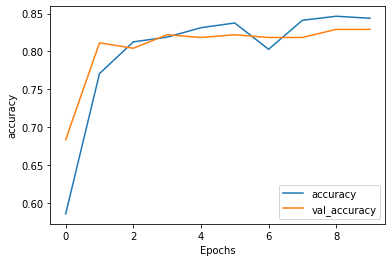

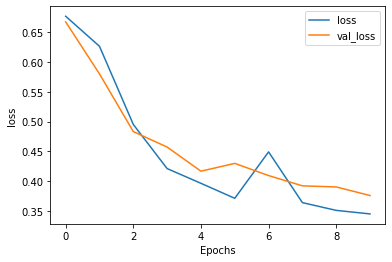

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.84      0.80      0.82       135

    accuracy                           0.83       281
   macro avg       0.83      0.83      0.83       281
weighted avg       0.83      0.83      0.83       281

Epoch 1/10
36/36 [==============================] - 13s 111ms/step - loss: 0.6273 - accuracy: 0.6316 - val_loss: 0.5442 - val_accuracy: 0.8185
Epoch 2/10
36/36 [==============================] - 2s 63ms/step - loss: 0.4450 - accuracy: 0.8225 - val_loss: 0.4635 - val_accuracy: 0.8149
Epoch 3/10
36/36 [==============================] - 2s 63ms/step - loss: 0.4046 - accuracy: 0.8243 - val_loss: 0.4278 - val_accuracy: 0.8043
Epoch 4/10
36/36 [==============================] - 2s 62ms/step - loss: 0.3706 - accuracy: 0.8341 - val_loss: 0.4095 - val_accuracy: 0.8256
Epoch 5/10
36/36 [==============================] - 2s 66ms/step - loss: 0.3599 - accuracy: 0.8350 - val_lo

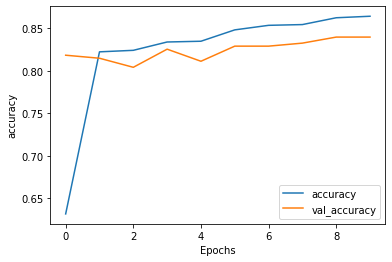

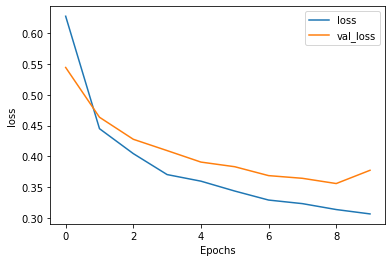

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       146
           1       0.85      0.81      0.83       135

    accuracy                           0.84       281
   macro avg       0.84      0.84      0.84       281
weighted avg       0.84      0.84      0.84       281

Epoch 1/10
36/36 [==============================] - 20s 195ms/step - loss: 0.6215 - accuracy: 0.7690 - val_loss: 0.4678 - val_accuracy: 0.7794
Epoch 2/10
36/36 [==============================] - 4s 113ms/step - loss: 0.3912 - accuracy: 0.8305 - val_loss: 0.4451 - val_accuracy: 0.8149
Epoch 3/10
36/36 [==============================] - 5s 132ms/step - loss: 0.4261 - accuracy: 0.8145 - val_loss: 0.4119 - val_accuracy: 0.8149
Epoch 4/10
36/36 [==============================] - 4s 110ms/step - loss: 0.3625 - accuracy: 0.8403 - val_loss: 0.4015 - val_accuracy: 0.8256
Epoch 5/10
36/36 [==============================] - 4s 112ms/step - loss: 0.3701 - accuracy: 0.8359 - va

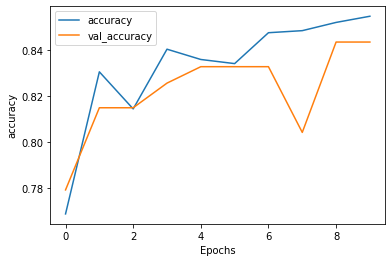

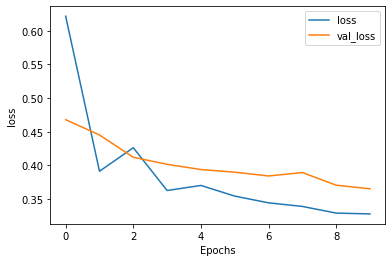

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       146
           1       0.83      0.84      0.84       135

    accuracy                           0.84       281
   macro avg       0.84      0.84      0.84       281
weighted avg       0.84      0.84      0.84       281

Epoch 1/20
36/36 [==============================] - 5s 48ms/step - loss: 0.6786 - accuracy: 0.5727 - val_loss: 0.6667 - val_accuracy: 0.6619
Epoch 2/20
36/36 [==============================] - 1s 23ms/step - loss: 0.6138 - accuracy: 0.7556 - val_loss: 0.5546 - val_accuracy: 0.8114
Epoch 3/20
36/36 [==============================] - 1s 28ms/step - loss: 0.4699 - accuracy: 0.8234 - val_loss: 0.4690 - val_accuracy: 0.8114
Epoch 4/20
36/36 [==============================] - 1s 37ms/step - loss: 0.4018 - accuracy: 0.8225 - val_loss: 0.4407 - val_accuracy: 0.8221
Epoch 5/20
36/36 [==============================] - 1s 33ms/step - loss: 0.3850 - accuracy: 0.8296 - val_loss

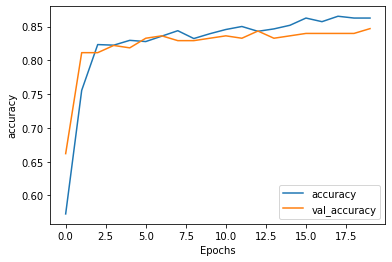

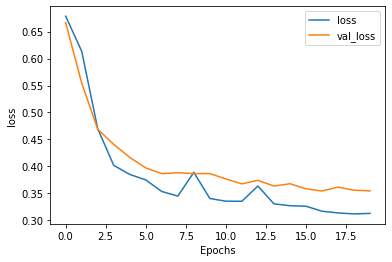

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       146
           1       0.85      0.82      0.84       135

    accuracy                           0.85       281
   macro avg       0.85      0.85      0.85       281
weighted avg       0.85      0.85      0.85       281

Epoch 1/20
36/36 [==============================] - 11s 109ms/step - loss: 0.6399 - accuracy: 0.6717 - val_loss: 0.5464 - val_accuracy: 0.7794
Epoch 2/20
36/36 [==============================] - 2s 62ms/step - loss: 0.4435 - accuracy: 0.8189 - val_loss: 0.4475 - val_accuracy: 0.8114
Epoch 3/20
36/36 [==============================] - 2s 62ms/step - loss: 0.3876 - accuracy: 0.8278 - val_loss: 0.4352 - val_accuracy: 0.7972
Epoch 4/20
36/36 [==============================] - 2s 62ms/step - loss: 0.3693 - accuracy: 0.8421 - val_loss: 0.4090 - val_accuracy: 0.8185
Epoch 5/20
36/36 [==============================] - 2s 61ms/step - loss: 0.3557 - accuracy: 0.8430 - val_lo

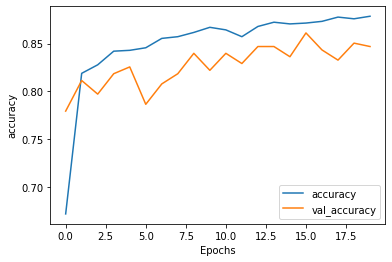

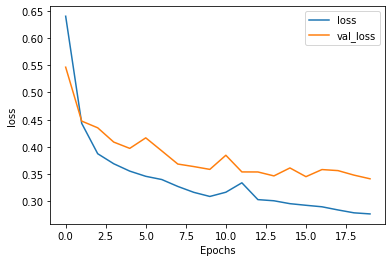

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       146
           1       0.81      0.89      0.85       135

    accuracy                           0.85       281
   macro avg       0.85      0.85      0.85       281
weighted avg       0.85      0.85      0.85       281

Epoch 1/20
36/36 [==============================] - 17s 163ms/step - loss: 0.6326 - accuracy: 0.6351 - val_loss: 0.5687 - val_accuracy: 0.7865
Epoch 2/20
36/36 [==============================] - 4s 107ms/step - loss: 0.5201 - accuracy: 0.7993 - val_loss: 0.5011 - val_accuracy: 0.7758
Epoch 3/20
36/36 [==============================] - 4s 100ms/step - loss: 0.4413 - accuracy: 0.8055 - val_loss: 0.4513 - val_accuracy: 0.8221
Epoch 4/20
36/36 [==============================] - 4s 98ms/step - loss: 0.4055 - accuracy: 0.8162 - val_loss: 0.4221 - val_accuracy: 0.7972
Epoch 5/20
36/36 [==============================] - 4s 98ms/step - loss: 0.4129 - accuracy: 0.8162 - val_

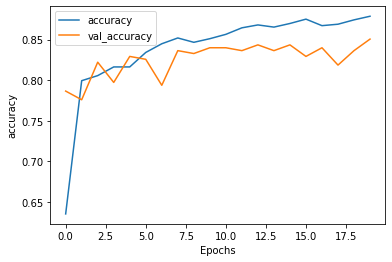

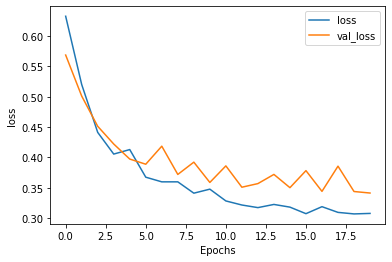

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       146
           1       0.86      0.82      0.84       135

    accuracy                           0.85       281
   macro avg       0.85      0.85      0.85       281
weighted avg       0.85      0.85      0.85       281

Epoch 1/30
36/36 [==============================] - 4s 44ms/step - loss: 0.6745 - accuracy: 0.6869 - val_loss: 0.6610 - val_accuracy: 0.7438
Epoch 2/30
36/36 [==============================] - 1s 26ms/step - loss: 0.6280 - accuracy: 0.7591 - val_loss: 0.5886 - val_accuracy: 0.7687
Epoch 3/30
36/36 [==============================] - 1s 25ms/step - loss: 0.5118 - accuracy: 0.8153 - val_loss: 0.4773 - val_accuracy: 0.8149
Epoch 4/30
36/36 [==============================] - 1s 25ms/step - loss: 0.4335 - accuracy: 0.8100 - val_loss: 0.4695 - val_accuracy: 0.7794
Epoch 5/30
36/36 [==============================] - 1s 26ms/step - loss: 0.3944 - accuracy: 0.8243 - val_loss

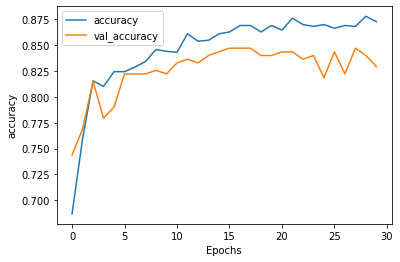

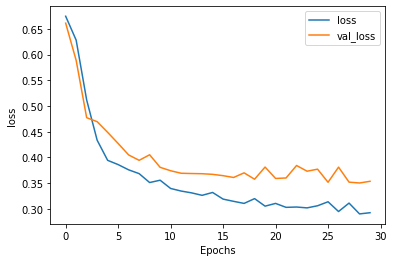

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       146
           1       0.80      0.87      0.83       135

    accuracy                           0.83       281
   macro avg       0.83      0.83      0.83       281
weighted avg       0.83      0.83      0.83       281

Epoch 1/30
36/36 [==============================] - 11s 111ms/step - loss: 0.6494 - accuracy: 0.6164 - val_loss: 0.5893 - val_accuracy: 0.7758
Epoch 2/30
36/36 [==============================] - 2s 63ms/step - loss: 0.4902 - accuracy: 0.8127 - val_loss: 0.4721 - val_accuracy: 0.8114
Epoch 3/30
36/36 [==============================] - 2s 65ms/step - loss: 0.4411 - accuracy: 0.8082 - val_loss: 0.4370 - val_accuracy: 0.7936
Epoch 4/30
36/36 [==============================] - 2s 66ms/step - loss: 0.3899 - accuracy: 0.8162 - val_loss: 0.4328 - val_accuracy: 0.7900
Epoch 5/30
36/36 [==============================] - 2s 64ms/step - loss: 0.3795 - accuracy: 0.8234 - val_lo

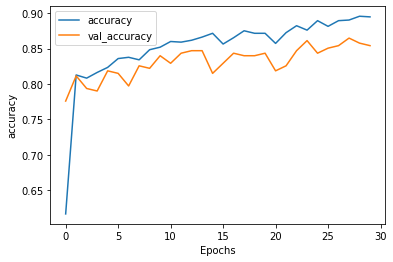

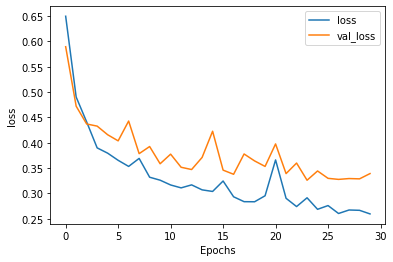

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       146
           1       0.84      0.86      0.85       135

    accuracy                           0.85       281
   macro avg       0.85      0.85      0.85       281
weighted avg       0.85      0.85      0.85       281

Epoch 1/30
36/36 [==============================] - 22s 241ms/step - loss: 0.6007 - accuracy: 0.7154 - val_loss: 0.4584 - val_accuracy: 0.7722
Epoch 2/30
36/36 [==============================] - 4s 117ms/step - loss: 0.3932 - accuracy: 0.8234 - val_loss: 0.5019 - val_accuracy: 0.7722
Epoch 3/30
36/36 [==============================] - 4s 102ms/step - loss: 0.3841 - accuracy: 0.8314 - val_loss: 0.4185 - val_accuracy: 0.8185
Epoch 4/30
36/36 [==============================] - 4s 118ms/step - loss: 0.3631 - accuracy: 0.8394 - val_loss: 0.3936 - val_accuracy: 0.8185
Epoch 5/30
36/36 [==============================] - 4s 102ms/step - loss: 0.3528 - accuracy: 0.8448 - va

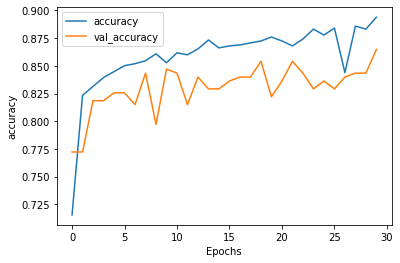

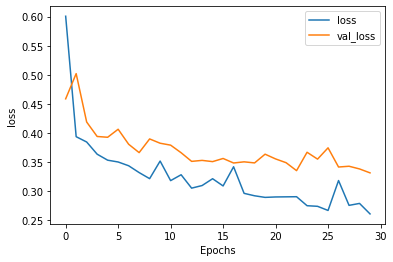

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       146
           1       0.88      0.84      0.86       135

    accuracy                           0.86       281
   macro avg       0.87      0.86      0.86       281
weighted avg       0.87      0.86      0.86       281



In [16]:
arr_batch = [32]
arr_epochs = [10,20,30]
algo_layers = [1,3,5]
output = {}
idx = 0
for batch in arr_batch:
    for epoch in arr_epochs:
        for layer in algo_layers:
            model = get_model(layer)
            history = run_model(model, batch, epoch)
            ev = model.evaluate(X_test, y_test)
            
            plot_graphs(history, "accuracy")
            plot_graphs(history, "loss")

            y_pred=model.predict(X_test) 
            y_pred=np.argmax(y_pred, axis=1)
            formated_y_test=np.argmax(y_test, axis=1)
            cm = classification_report(formated_y_test, y_pred)
            print(cm)
            
            output[idx] = {'batch':batch, 'epoch':epoch, 'num_of_layer':layer, 'acc':ev, 'cm':cm}
            idx = idx+1;

In [17]:
output

{0: {'batch': 32,
  'epoch': 10,
  'num_of_layer': 1,
  'acc': [0.37604185938835144, 0.8291814923286438],
  'cm': '              precision    recall  f1-score   support\n\n           0       0.82      0.86      0.84       146\n           1       0.84      0.80      0.82       135\n\n    accuracy                           0.83       281\n   macro avg       0.83      0.83      0.83       281\nweighted avg       0.83      0.83      0.83       281\n'},
 1: {'batch': 32,
  'epoch': 10,
  'num_of_layer': 3,
  'acc': [0.3775501549243927, 0.8398576378822327],
  'cm': '              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       146\n           1       0.85      0.81      0.83       135\n\n    accuracy                           0.84       281\n   macro avg       0.84      0.84      0.84       281\nweighted avg       0.84      0.84      0.84       281\n'},
 2: {'batch': 32,
  'epoch': 10,
  'num_of_layer': 5,
  'acc': [0.3650945723056793, 0.843416392

In [19]:
import json
json_object = json.dumps(output, indent = 4)
with open('model_v0.0.0_cbw_cnn_gru_dense.json', 'a') as fp:
    fp.write(json_object)